## Problem statement : https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/overview

In [5]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plot
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split


%matplotlib inline

In [13]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

datagen = ImageDataGenerator(preprocess_input,validation_split=0.2)
image_size = 224
train_generator = datagen.flow_from_directory(
    '../../datasets/dog-vs-cat/train/train/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=100,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '../../datasets/dog-vs-cat/train/train/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)



history = model.fit_generator(train_generator, epochs=2, validation_data=val_generator,validation_steps=1)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/2
200/200 [==============================] - 5264s 26s/step - loss: 0.0579 - categorical_accuracy: 0.9769
Epoch 2/2
200/200 [==============================] - 977s 5s/step - loss: 0.0484 - categorical_accuracy: 0.9806


In [57]:
test_generator = datagen.flow_from_directory(
    '../../datasets/dog-vs-cat/test/',
    target_size=(image_size, image_size),
    color_mode='rgb',
    classes=['test'],
    class_mode=None,
    shuffle=False
)

Found 12500 images belonging to 1 classes.


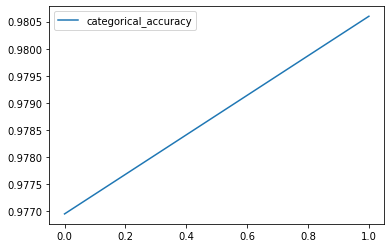

In [33]:
plot.plot(history.history['categorical_accuracy'])
#plot.plot(history.history['val_categorical_accuracy'])
plot.legend(['categorical_accuracy','val_categorical_accuracy'])

In [74]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [98]:
pred = model.predict_generator(test_generator,verbose = 1)

391/391 [==============================] - 955s 2s/step


In [99]:
pred.shape

(12500, 2)

In [76]:
import numpy as np

In [124]:
fn = test_generator.filenames

In [120]:
fn

['test/1.jpg',
 'test/10.jpg',
 'test/100.jpg',
 'test/1000.jpg',
 'test/10000.jpg',
 'test/10001.jpg',
 'test/10002.jpg',
 'test/10003.jpg',
 'test/10004.jpg',
 'test/10005.jpg',
 'test/10006.jpg',
 'test/10007.jpg',
 'test/10008.jpg',
 'test/10009.jpg',
 'test/1001.jpg',
 'test/10010.jpg',
 'test/10011.jpg',
 'test/10012.jpg',
 'test/10013.jpg',
 'test/10014.jpg',
 'test/10015.jpg',
 'test/10016.jpg',
 'test/10017.jpg',
 'test/10018.jpg',
 'test/10019.jpg',
 'test/1002.jpg',
 'test/10020.jpg',
 'test/10021.jpg',
 'test/10022.jpg',
 'test/10023.jpg',
 'test/10024.jpg',
 'test/10025.jpg',
 'test/10026.jpg',
 'test/10027.jpg',
 'test/10028.jpg',
 'test/10029.jpg',
 'test/1003.jpg',
 'test/10030.jpg',
 'test/10031.jpg',
 'test/10032.jpg',
 'test/10033.jpg',
 'test/10034.jpg',
 'test/10035.jpg',
 'test/10036.jpg',
 'test/10037.jpg',
 'test/10038.jpg',
 'test/10039.jpg',
 'test/1004.jpg',
 'test/10040.jpg',
 'test/10041.jpg',
 'test/10042.jpg',
 'test/10043.jpg',
 'test/10044.jpg',
 'test/

In [125]:
rep1 = [s.replace('test/', '') for s in fn]
rep2 = rep1 = [s.replace('.jpg', '') for s in rep1]
res = [eval(i) for i in rep2]

In [126]:
res

[1,
 10,
 100,
 1000,
 10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 1001,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 1002,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 1003,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 1004,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 1005,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 1006,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 1007,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 1008,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 1009,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 101,
 1010,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 1011,
 10110,
 10111,

In [129]:
np.array(res)

array([   1,   10,  100, ..., 9997, 9998, 9999])

In [132]:
len(res)

12500

In [101]:
pred[:,1]

array([9.9996531e-01, 4.6212607e-04, 1.4102770e-04, ..., 9.9751955e-01,
       2.8574101e-05, 3.6460311e-05], dtype=float32)

In [102]:
import numpy as np
predict = np.argmax(pred, axis = 1)
predict

array([1, 0, 0, ..., 1, 0, 0])

In [133]:
output = pd.DataFrame()
output['id'] = np.array(res)
output['label'] = pred[:,1]

In [135]:
output.to_csv("dog-vs-cat_result.csv",header=True,index=False)